# **Bootcamp de Machine Learning**

## **Regularização**

<a id="home"></a> 
### **Agenda**

* [Regressão Linear](#linear_regression_section)
* [Regularização](#regularizacao_section)
    * [Overfitting e underfitting](#overfitting_underfitting)
    * [Revisão Regressão Linear](#review_reg_lin)
    * [Ridge](#ridge)
    * [Lasso](#lasso)
    * [Elastic-Net](#elastic_net)
    * [Resumo](#resumo)
* [Hands On¹!](#hands_on_1)
* [Hands On²!](#hands_on_2)
* [Homework](#homework)
* [Referências](#ref)
* [Para aprofundar: hipóteses da regressão linear](#leitura_casa)
* [Next Steps](#next_steps)

<a id="linear_regression_section"></a> 
## **Regressão Linear**

Vamos prever o salário do indivíduo com base no seu nível de escolaridade.

In [1]:
import statsmodels.formula.api as smf
import wooldridge as woo
import matplotlib.pyplot as plt
import pandas as pd
# !pip3 install wooldridge

In [2]:
wage_data = woo.dataWoo('wage1')

In [3]:
wage_data.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


Vamos estimar o seguinte modelo:

$\text{wage} = \beta_0+\beta_1\text{educ}+\epsilon$

O que podemos entender deste modelo? Quais as limitações?

In [4]:
regression = smf.ols(formula = 'wage ~ educ', data = wage_data).fit()

In [5]:
regression.params

Intercept   -0.904852
educ         0.541359
dtype: float64

Modelo estimado:

$\widehat{\text{wage}} = -0.90+0.54\text{educ}$

Qual a interpretação deste modelo?

Um ano adicional de educação aumenta o salário/hora em $0.54 cents.

In [6]:
regression = smf.ols(formula = 'wage ~ educ', data = wage_data).fit()

def previsao_salario(educacao, regression):
    beta_0 = regression.params[0]
    beta_1 = regression.params[1]
    estimativa = round(beta_0+beta_1*educacao, 2)
    mensagem = f'Com uma educação de {educacao} anos o ganho médio/hora estimado será: {estimativa}'
    return mensagem

In [7]:
for i in range(5, 20, 2):
    print(previsao_salario(i, regression))

Com uma educação de 5 anos o ganho médio/hora estimado será: 1.8
Com uma educação de 7 anos o ganho médio/hora estimado será: 2.88
Com uma educação de 9 anos o ganho médio/hora estimado será: 3.97
Com uma educação de 11 anos o ganho médio/hora estimado será: 5.05
Com uma educação de 13 anos o ganho médio/hora estimado será: 6.13
Com uma educação de 15 anos o ganho médio/hora estimado será: 7.22
Com uma educação de 17 anos o ganho médio/hora estimado será: 8.3
Com uma educação de 19 anos o ganho médio/hora estimado será: 9.38


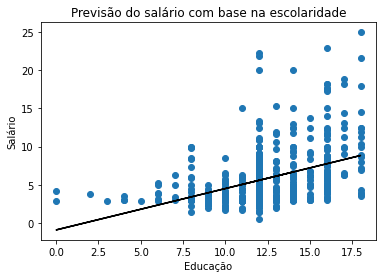

In [8]:
plt.scatter(wage_data['educ'], wage_data['wage'])
plt.plot(wage_data['educ'], regression.fittedvalues, 'k')
plt.xlabel('Educação')
plt.ylabel('Salário')
plt.title('Previsão do salário com base na escolaridade');

Vamos estimar o seguinte modelo:
$$\widehat{\text{wage}} = \hat{\beta}_0 +\hat{\beta}_1\text{educ}+\hat{\beta}_2\text{exper}+\hat{\beta}_3\text{tenure}$$

Como podemos interpretar os parâmatros estimados?


Interpretamos os $\beta_i$ como o efeito médio do incremento de uma unidade de $X_j$ sobre $Y$, mantendo todos os outros fatores constantes. Isto é,
* $\beta_1$: aumento no salário (ganho médio/hora) em $\beta_1$ para um aumento de 1 ano na escolaridade; e assim sucessivamente.

O que acontece se houver variáveis categóricas? Veremos isso na próxima aula.


Vamos obter os parâmetros $\hat{\beta}_0,\hat{\beta}_1,\hat{\beta}_2,\hat{\beta}_3$.

$$\hat{\beta}_1 = \dfrac{\Delta\widehat{\text{wage}}}{\Delta\text{educ}}$$

$$\hat{\beta}_2 = \dfrac{\Delta\widehat{\text{wage}}}{\Delta\text{exp}} $$

$$\hat{\beta}_3 = \dfrac{\Delta\widehat{\text{wage}}}{\Delta\text{tenure}} $$

In [9]:
model = smf.ols(formula = 'wage ~ educ+exper+tenure', data = wage_data).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     76.87
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           3.41e-41
Time:                        09:45:32   Log-Likelihood:                -1336.8
No. Observations:                 526   AIC:                             2682.
Df Residuals:                     522   BIC:                             2699.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8727      0.729     -3.941      0.000      -4.305      -1.441
educ           0.5990      0.051     11.679      0.000       0.498       0.700
exper          0.0223      0.012      1.853      0.064      -0.001       0.046
tenure         0.1693      0.022      7.820      0.000       0.127       0.212
==============================================================================
Omnibus:                      179.597   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.808
Skew:                           1.555   Prob(JB):                    4.77e-142
Kurtosis:                       7.475   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do resumo acima, podemos ver também o $R^2$ do modelo que resultou em $30,6\%$%

Portanto, nosso modelo ajustado é:
$$\widehat{\text{wage}} = -2.87+0.59\text{educ}+0.022\text{exper}+0.169\text{tenure}$$

[Voltar](#home)

<a id="regularizacao_section"></a> 

## **Regularização** 

* A regressão linear funciona como uma máquina, temos uma entrada (input de variáveis) e uma saída (output/previsão).
* Em uma regressão linear simples o melhor ajuste da reta resulta na escolha dos parâmetros de inclinação e intercepto.

<img src = 'https://pbs.twimg.com/media/DdkUUTMV4AAsohU.jpg' width = 200>

<a id="overfitting_underfitting"></a> 

**Overfitting e underfitting**


Antes de definir os conceitos vamos imaginar que um professor precisa aplicar uma prova em seus alunos e para tanto deu uma prova com gabarito para que a classe pudesse estudar. Semanas depois o professor aplicou exatamente a mesma prova e verificou que todos os alunos da turma conseguiram acertar todas as questões na prova. Com este método podemos dizer que o professor de fato conseguiu mensurar o aprendizado da turma? Será que os alunos decoraram a prova ao invés de aprender?

Parece simples, mas essa analogia ocorrer dentro do Machine Learning. Precisamos aplicar uma prova com os mesmos assuntos, mas com questões diferentes.


Com base nisso qual seria o melhor modelo da figura abaixo?

<img src = 'https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png'/>

Algumas conclusões:
* Primeiro modelo: parece não capturar bem o fenômeno de interesse. Neste caso estamos em um cenário de underfiting. 
    * Diagnóstico: métricas de treino/teste ruins (R², MSE, RMSE, MAE, Gini)
* Segundo modelo: cenário atual (good fit)
* Terceiro modelo: modelo com ajuste perfeito. Neste caso estamos em um cenário de overfitting.
    * Diagnóstico: métrica de avaliação muito boa no conjunto de treinamento (modelo erra pouco no conjunto de treino); métrica de avaliação ruim no conjunto de teste (modelo erra muito no conjunto de teste); a diferença entre as métricas de treino e teste pode ser muito elevada.
    * Neste caso podemos ter um modelo com muitos parâmetros e muito sensível aos dados de treino.
    
    
Correções

Overfitting
* Regularização (reduz a complexidade do modelo)
* Redução de quantidade de features (feature selection)
* Reduzir a complexidade do modelo
* Aumentar o conjunto de treinamento

Underfitting
* Inserir mais variáveis (feature engineering)
* Aumentar a complexidade do modelo

Overfitting Meme

<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-bvur53lsgzbVjTbSQ6Hi5FZ5Zb7TH93o1Q&usqp=CAU' width =  300/>

<img src = 'https://pbs.twimg.com/media/FSAM8FuXwAA4HQf.jpg' width = 300/>

Já vimos a parte teórica do overfitting, mas agora precisamos ver de forma prática.

In [11]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

KeyboardInterrupt: 

In [ ]:
# carrega os dados
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [ ]:
# features
X = df.drop(columns = ['target'])
# target
y = df.target
# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)

In [ ]:
regressor = LGBMRegressor(max_depth=-1)
# fit
regressor.fit(X_train, y_train)

In [ ]:
def predict(estimator, X_train, X_test):
    # y pred train
    y_pred_train = estimator.predict(X_train)
    # y test train
    y_pred_test = estimator.predict(X_test)
    return y_pred_train, y_pred_test

def get_r2_score(estimator, y_train, y_test):
    # y pred
    y_pred_train, y_pred_test = predict(estimator, X_train, X_test)
    # r2 score train
    r2_train = r2_score(y_train, y_pred_train)
    # r2 score test
    r2_test = r2_score(y_test, y_pred_test)
    return r2_train, r2_test

In [ ]:
get_r2_score(regressor, y_train, y_test)

Agora vamos reduzir a complexidade do nosso modelo.

In [ ]:
regressor = LGBMRegressor(max_depth = 2)
# fit
regressor.fit(X_train, y_train)

In [ ]:
get_r2_score(regressor, y_train, y_test)

Observe como reduzir a complexidade do modelo reduziu a diferença das métricas no treino e teste.

[Voltar](#home)

<a id="bias_variance"></a> 

**Bias-variance**

<img src = 'https://miro.medium.com/max/984/0*_zo14nQHrTJ-DF00.png'/>

<a id="review_reg_lin"></a> 

**Revisão Regressão linear**


A regressão linear (OLS) minimiza a seguinte função:


$$RSS = \sum_{i=1}^{n}\left(y_i-\beta_0-\sum_{j=1}^{p}\beta_j x_{ij}\right)^2$$

Em que RSS = Residual Sum of Squares.

Referência: [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)


Ver: https://arachnoid.com/polysolve/

<a id="ridge"></a> 


**Ridge**

É similar ao OLS mas os coeficientes são estimados com uma pequena diferença. A ideia é minimizar a soma do quadrado dos resíduos mais uma penalização dos parâmetros ao quadrado.

Também conhecida como regularização **L2**.

Termos de regularização L2: 

$$\beta_1^2+\beta_2^2+\beta_3^2+\dots+\beta_n^2$$

Então nossa Loss Function será:

$$\text{minimizar}\left[\text{Loss Function(modelo)}+\alpha \times \text{Complexidade(modelo)}\right]$$


Ou ainda:

$$\text{Loss function} = \sum_{i=1}^{n}\left(y_i-\beta_0-\sum_{j=1}^{p}\beta_j x_{ij}\right)^2+\alpha\sum_{j=1}^{p}\beta_j^2$$

$$\text{Loss function} = RSS+\alpha \sum_{j=1}^{p}\beta_j^2$$

Em que:
* $\alpha$: hiperparâmetro que precisamos escolhar (número utilizado para a penalização). 
* Se $\alpha = 0$ temos uma regressão OLS.
* Se $\alpha \rightarrow \infty$ podemos ter underfitting.
* A Ridge Regression não é robusta à outliers.

Referência: [sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

<a id="lasso"></a> 

**Lasso**

Outra formulação é a regressão Lasso:

$$\text{Loss function} = \sum_{i=1}^{n}\left(y_i-\beta_0-\sum_{j=1}^{p}\beta_j x_{ij}\right)^2+\alpha \sum_{j=1}^{p}|\beta_j|$$

$$\text{Loss function} = RSS+\alpha \sum_{j=1}^{p}|\beta_j|$$

* Lasso pode ser utilizado para feature selection (isso não é verdade para a Ridge Regression).
* Features menos importantes com coeficiente igual a zero.
* Robusta à outliers.
* Na função `Lasso()` o parâmetro `alpha` controlar a força da regularização e deve ser um número não negativo $[0, \infty)$ (analogamente para a funçã `Ridge()`.
* Também conhecida como regularização **L1**.

Referência: [sklearn.linear_model.Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

<a id="elastic_net"></a> 

**Elastic-Net**

É a combinação da regressão Lasso e Ridge.


Referência: [sklearn.linear_model.ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)

<a id="resumo"></a> 

**Resumo**

O que aprendemos até aqui:

Sem regularização teremos:
* minimizar Loss Function


Com regularização:
* minimizar Loss Function + Complexidade

A seguir iremos ver uma implementação prática em que buscamos simular o que ocorre com a performance de um modelo quando aumentamos a força da regularização.

In [ ]:
def test_regularization(model):
    """
    docstring
    """
    
    list_alpha = [0.001, 0.01, 0.1, 0.3, 0.5, 1, 10, 50, 100, 1000, 2000, 3000, 4000, 5000]
    # data to append results
    result_df = pd.DataFrame(columns = ['alpha', 'r2_train', 'r2_test'])
    
    for alpha_number in list_alpha:
        # set alpha numbet
        model = model.set_params(alpha = alpha_number)
        # train 
        model.fit(X_train, y_train)
        # predict
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        # score
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        result = pd.DataFrame({'alpha': [alpha_number],
                               'r2_train': [r2_train],
                               'r2_test': [r2_test]
                              })
        result_df = result_df.append(result)
        
    # create df final
    result_df = result_df.round(4).reset_index(drop = True)
    return result_df

In [ ]:
result_df_ridge = test_regularization(model = Ridge())
result_df_lasso = test_regularization(model = Lasso())

In [ ]:
fig = px.line(
    result_df_ridge,
    x = 'alpha',
    y = ['r2_train', 'r2_test'],
    title = 'Ridge Regression'
)

fig.update_layout(plot_bgcolor = 'white')

In [ ]:
fig = px.line(
    result_df_lasso,
    x = 'alpha',
    y = ['r2_train', 'r2_test'],
    title = 'Lasso Regression'
)

fig.update_layout(plot_bgcolor = 'white')

[Voltar](#home)

<a id="hands_on_1"></a> 

## **Hands On¹!**

Neste Hands On! vamos usar os dados do ENEM para tentar estabelecer uma interpretação dos parâmetros do modelo. Nosso objetivo é explicar o desempenho escolar.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [ ]:
# leitura da base
amostra = pd.read_csv('amostra_enem_bahia.csv')
# filtra apenas alunos de escolas públicas ou privadas
amostra = amostra[amostra.TP_ESCOLA.isin([2, 3])]
# filtra alunos que não obtiveram 0 em Matemática
# filtra alunos com mais de 14 anos
amostra = amostra.query('(NU_NOTA_MT != 0) & (NU_IDADE >= 14)')

In [ ]:
# prepara a base
base_amostra = pd.DataFrame()
base_amostra['dummy_sexo_feminino'] = amostra.TP_SEXO.map({'F': 1, 'M': 0})
base_amostra['municipio_residencia'] = amostra.NO_MUNICIPIO_RESIDENCIA
base_amostra['idade'] = amostra.NU_IDADE
base_amostra['cor_raca'] = amostra['TP_COR_RACA']
base_amostra['escola_publica'] = amostra['TP_ESCOLA'].map({3: 0, 2: 1})
base_amostra['nota_matematica'] = amostra['NU_NOTA_MT']
base_amostra['escolaridade_pai'] = amostra.Q001.map({'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 1, 'F': 1, 'G': 1, 'H': 0})
base_amostra['escolaridade_mae'] = amostra.Q002.map({'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 1, 'F': 1, 'G': 1, 'H': 0})
base_amostra['tamanho_familia'] = amostra.Q005
values_to_map = {value:index for index, value in enumerate(np.sort(amostra.Q006.unique()), start = 1)}
base_amostra['renda_familiar'] = amostra.Q006.map(values_to_map)
base_amostra['internet'] = amostra.Q025.map({'A': 0, 'B': 1})
base_amostra['computador'] = amostra.Q024.map({'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 1})
base_amostra.dropna(inplace = True)

In [ ]:
# relação entre o nível de renda familiar e a nota em Matemática
plt.figure(figsize = (12, 4))
sns.boxplot(data = base_amostra, x = 'renda_familiar', y = 'nota_matematica')
plt.title('Relação entre a nota em Matemática e suas tecnologias e o nível de renda familiar')
plt.xlabel('Nível de renda familiar')
plt.ylabel('Nota em Matemática e suas tecnologias')
plt.show()

In [ ]:
# modelo de regressão linear
modelo = smf.ols(
formula = """
np.log(nota_matematica) ~ idade
                      +dummy_sexo_feminino
                      +escola_publica
                      +escolaridade_pai
                      +escolaridade_mae
                      +tamanho_familia
                      +renda_familiar
                      +internet
                      +computador
                      
""",
data = base_amostra
).fit()

In [ ]:
modelo.summary()


* Os parâmetros do modelo são significativos.
* Log-Likelihood: usamos para fazer comparação entre modelos; varia de $-\infty,+\infty$ e quanto maior o valor, melhor o modelo. O modelo 1 é melhor que o 2 sob essa regra.
* AIC e BIC são utilizados para comparar modelos, com fundamentação estatística mais rigorosa que o $R^2$ ajustado. O modelo com menor critério de informação é o melhor.
* Teste Omnibus: normalidade da distribuição dos resíduos do modelo. 0 indica normalidade perfeita. Prob(Omnibus) mensura a probabilidade de os resíduos serem normalmente distribuídos. 1 indica distribuição perfeitamente normal.
* Skew: mede o grau de simetria (assimetria) da distribuição dos resíduos. Se a distribuição for normal a assimetria é nula. Se a distribuição for assimétrica positiva (negativa) os valores são positivos (negativos).
* Curtose: mede o grau de achatamento da distribuição de probabilidade.
* Os resíduos do modelo são normalmente distribuídos?
* Teste de autocorrelação DW:
    * Valor próximo de 4: há evidência de autocorrelação negativa;
    * Valor próximo de 2: há evidência de ausência de autocorrelação;
    * Valor próximo de 0: há evidência de autocorrelação positiva.
* Teste F: Teste de significância conjunta dos parâmetros.
    * $H_0: \beta_1=\beta_2=\beta_3=\dots=\beta_k=0$
    * $H_1: \beta_k \neq 0 $
* Teste t: testa de significância individual dos parâmaetros do modelo
    * $H_0: \beta_j = 0$
    * $H_1: \beta_j \neq 0$
    * Se $\beta_j = 0$ então não há relação linear entre a variável explicativa e a variável dependente.

[Voltar](#home)

<a id="hands_on_2"></a> 

## **Hands On²!**

Nesta seção vejamos como usar a regressão Lasso para feature selection.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# carrega os dados
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [ ]:
# features
X = df.drop(columns = ['target'])
# target
y = df.target
# split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)

In [ ]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

In [ ]:
importance = np.abs(lasso_reg.coef_)

In [ ]:
importance_df = pd.DataFrame({'features': importance}, index = X_train.columns)

In [ ]:
importance_df = importance_df.sort_values(by = 'features', ascending = False)

In [ ]:
# features selecionadas
importance_df[importance_df.features > 0 ]

[Voltar](#home)

<a id="homework"></a> 

## **Homework**

In [12]:
import wooldridge as woo
wage_data = woo.dataWoo('wage1')
wage_data.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [13]:
y = wage_data['wage']
X = wage_data.drop(columns='wage', axis=1)

In [14]:
X.columns

Index(['educ', 'exper', 'tenure', 'nonwhite', 'female', 'married', 'numdep',
       'smsa', 'northcen', 'south', 'west', 'construc', 'ndurman', 'trcommpu',
       'trade', 'services', 'profserv', 'profocc', 'clerocc', 'servocc',
       'lwage', 'expersq', 'tenursq'],
      dtype='object')

In [15]:
colunas = X.columns

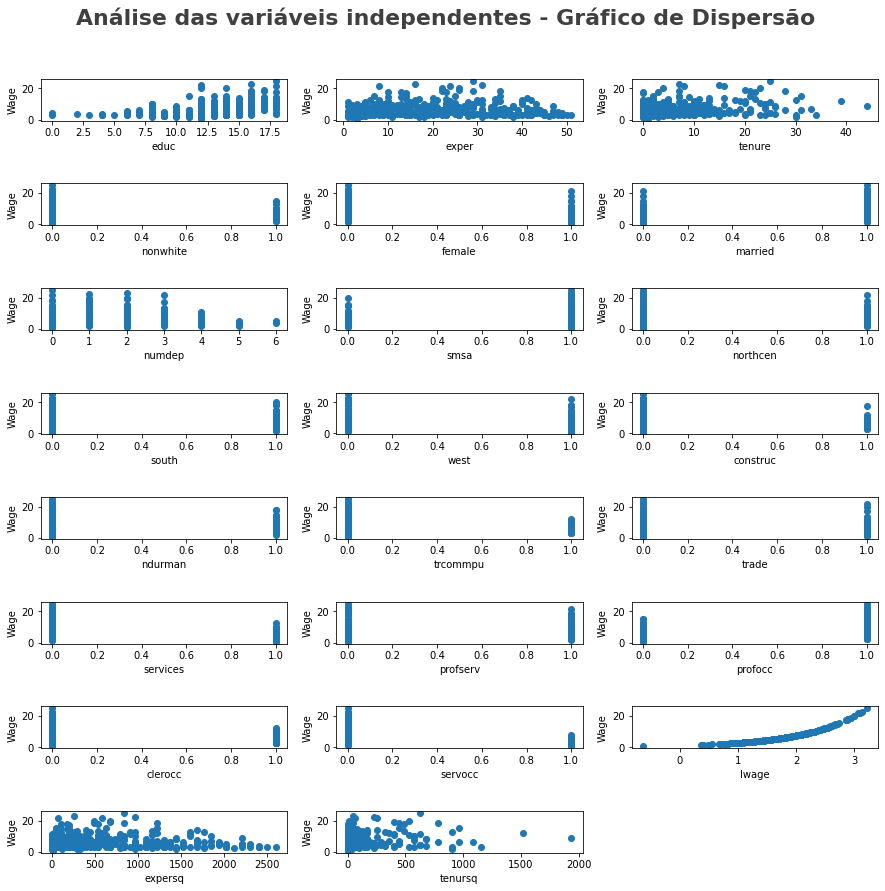

In [16]:

# Gráfico de dispersão
n_linhas = 8
colunas = 3
posicao = 1
# Tamanho das Figuras
plt.subplots(figsize=(15,10))
# Título
plt.suptitle('Análise das variáveis independentes - Gráfico de Dispersão', fontsize=22, color='#404040', fontweight=600, y = 1.3)
# Plotar as 23 colunas no X
for coluna in X.columns:
    plt.subplot(n_linhas,colunas,posicao)
    plt.scatter(wage_data[coluna], wage_data['wage'])
    plt.xlabel(coluna)
    plt.ylabel('Wage')
    posicao += 1
# Ajuste de Grid
plt.subplots_adjust( top=1.2, hspace=1.5 )

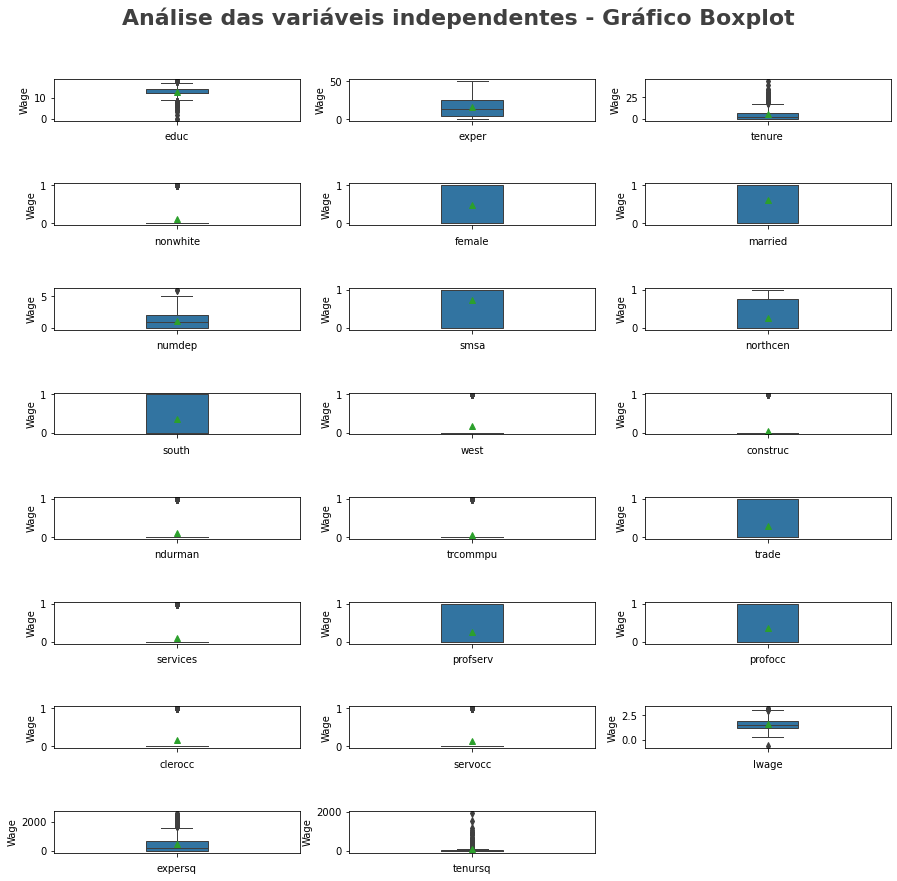

In [17]:
import seaborn as sns


# Gráfico Boxplot
n_linhas = 8
colunas = 3
posicao = 1
# Tamanho das Figuras
plt.subplots(figsize=(15,10))
# Título
plt.suptitle('Análise das variáveis independentes - Gráfico Boxplot', fontsize=22, color='#404040', fontweight=600, y = 1.3)
# Plotar as 23 colunas no X
for coluna in X.columns:
    plt.subplot(n_linhas,colunas,posicao)
    sns.boxplot(data=wage_data, y =coluna, showmeans=True, saturation=0.75, linewidth=1, width=0.25)    
    plt.xlabel(coluna)
    plt.ylabel('Wage')
    posicao += 1
# Ajuste de Grid
plt.subplots_adjust( top=1.2, hspace=1.5 )

In [18]:
wage_data.corr()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
wage,1.000000,0.405903,0.112903,0.346890,-0.038520,-0.340098,0.228817,-0.053760,0.177885,-0.029124,...,0.055940,-0.189848,-0.141624,0.085204,0.441770,-0.140837,-0.253078,0.937062,0.030238,0.267419
educ,0.405903,1.000000,-0.299542,-0.056173,-0.084654,-0.085029,0.068881,-0.215291,0.224309,0.061372,...,0.107736,-0.059204,-0.072659,0.214198,0.496768,-0.008324,-0.163345,0.431053,-0.331256,-0.069106
exper,0.112903,-0.299542,1.000000,0.499291,0.014356,-0.041626,0.316984,-0.056319,-0.117260,0.010588,...,-0.048267,-0.104626,0.041499,-0.020599,-0.005615,-0.040385,-0.071080,0.111373,0.960971,0.422942
tenure,0.346890,-0.056173,0.499291,1.000000,0.011589,-0.197910,0.239889,-0.027037,0.000745,0.014093,...,0.063885,-0.126224,-0.062604,-0.059691,0.090624,-0.072831,-0.112679,0.325538,0.459223,0.921564
nonwhite,-0.038520,-0.084654,0.014356,0.011589,1.000000,-0.010917,-0.062259,0.077701,-0.014147,-0.080201,...,-0.072328,-0.048486,0.094866,-0.056680,-0.088552,-0.034138,-0.028769,-0.038888,0.009348,-0.007203
female,-0.340098,-0.085029,-0.041626,-0.197910,-0.010917,1.000000,-0.166128,0.033148,0.016545,0.015453,...,-0.018964,-0.053351,0.108833,0.215939,-0.177376,0.355233,0.159226,-0.373677,-0.027860,-0.175623
married,0.228817,0.068881,0.316984,0.239889,-0.062259,-0.166128,1.000000,0.154497,-0.097230,-0.011716,...,0.038239,-0.136572,-0.054906,0.064603,0.085544,0.025711,-0.157040,0.270669,0.217289,0.166822
numdep,-0.053760,-0.215291,-0.056319,-0.027037,0.077701,0.033148,0.154497,1.000000,-0.096368,-0.089640,...,-0.014791,0.047992,-0.061708,-0.072145,-0.123401,0.028897,0.055361,-0.095297,-0.130906,-0.056640
smsa,0.177885,0.224309,-0.117260,0.000745,-0.014147,0.016545,-0.097230,-0.096368,1.000000,0.055216,...,0.007973,0.017948,0.010028,0.046049,0.145965,0.107216,-0.030039,0.200124,-0.110918,0.004473
northcen,-0.029124,0.061372,0.010588,0.014093,-0.080201,0.015453,-0.011716,-0.089640,0.055216,1.000000,...,-0.059439,0.020417,-0.062645,0.068810,0.068841,-0.024479,0.043253,-0.015858,0.033540,0.009093


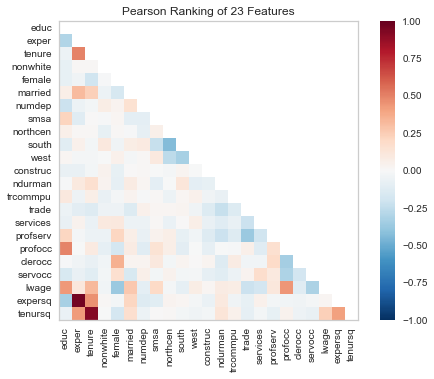

In [19]:
# Yellowbrick
from yellowbrick.features import Rank2D

# Definir o modelo
correlacao = Rank2D( algoritmo='pearson' )

# Filtrar função
correlacao.fit( X, y )
correlacao.transform( X )
correlacao.show();

In [20]:
wage_data.isna().sum()

wage        0
educ        0
exper       0
tenure      0
nonwhite    0
female      0
married     0
numdep      0
smsa        0
northcen    0
south       0
west        0
construc    0
ndurman     0
trcommpu    0
trade       0
services    0
profserv    0
profocc     0
clerocc     0
servocc     0
lwage       0
expersq     0
tenursq     0
dtype: int64

### EAD

In [21]:
wage_data.describe(include='all')

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


In [22]:
### outliers 
# tenursq
# tenure
wage_data['tenursq'].max()


1936

In [23]:
wage_data[wage_data['tenure']>30]

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
73,2.91,12,20,34,0,1,1,2,1,0,...,0,0,1,0,0,1,0,1.068153,400,1156
91,11.76,14,40,39,0,0,1,0,1,0,...,1,0,0,0,1,0,0,2.464704,1600,1521
264,8.75,12,47,44,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.169054,2209,1936
306,6.25,11,35,31,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1.832582,1225,961
342,15.00,11,35,31,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.708050,1225,961
457,6.50,14,41,33,0,0,1,0,1,1,...,0,1,0,0,1,0,0,1.871802,1681,1089


In [24]:
wage_data.shape

(526, 24)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [26]:
print(f'Dados de treino: {X_train.shape[0]}')
print(f'Dados de teste: {X_test.shape[0]}')

Dados de treino: 420
Dados de teste: 106


In [27]:
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

## Testando Modelos Diferentes

### LinearRegression()
- R^2 (0.8826488779403315, 0.9140790920376987)
- Mean Squared Error (MSE) (1.2568291288593483)

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
model.score(X, y)

0.8894551143451711

In [31]:
# Mean Squared Error
# y test train 
y_pred_test = model.predict(X_test)

mean_squared_error(y_test, y_pred_test)

1.2568291288593483

In [32]:
get_r2_score(model, y_train, y_test)

NameError: name 'get_r2_score' is not defined

In [ ]:
model.predict(X.head(1))

### LGBMRegressor()
- R^2 (0.9550591303277013, 0.9409145227629057)
- Mean Squared Error (MSE) (0.864287292177111)

In [ ]:
regressor = LGBMRegressor(max_depth=3)
# fit
regressor.fit(X_train, y_train)

In [ ]:
get_r2_score(regressor, y_train, y_test)

In [ ]:
# Testando o modelo
regressor.predict(X.head(1))

In [ ]:
y.head(1)

In [ ]:
X.head(1)

In [ ]:
# Mean Squared Error
# y test train 
y_pred_test_regressor = regressor.predict(X_test)

mean_squared_error(y_test, y_pred_test_regressor)

### smf

In [ ]:
wage_data.columns

In [ ]:

# modelo de regressão linear
modelo = smf.ols(
formula = """
wage ~ educ
                      +lwage
                      +exper
                      +tenure
                      +expersq
                      +tenursq
                      
""",
data = wage_data
).fit()

In [ ]:
modelo.summary()

In [ ]:
modelo.predict(X.head(1))

In [ ]:
y.head(1)

## Feature Selection com Lasso()

In [ ]:
### Selection Features
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

importance = np.abs(lasso_reg.coef_)
importance_df = pd.DataFrame({'features': importance}, index = X_train.columns)
importance_df = importance_df.sort_values(by = 'features', ascending = False)
importance_df[importance_df['features']>0]

In [ ]:
X_new = wage_data[['lwage','educ','exper','tenure','expersq','tenursq']]

#### Model Selection train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=4)

#### LGBMRegressor

In [ ]:
regressor = LGBMRegressor(max_depth=3)
# fit
regressor.fit(X_train, y_train)

In [ ]:
get_r2_score(regressor, y_train, y_test)

In [ ]:
# Mean Squared Error
# y test train 
y_pred_test_regressor = regressor.predict(X_test)

mean_squared_error(y_test, y_pred_test_regressor)

Com base no dataset anterior responda:

* Estude a relação entre as variáveis e a variável target (gráficos de dispersão e correlação)
* Ajuste outras regressões que você julgue ter potencial para resolver o problema de predição do salário.
* Você identificou outliers? Identificou missing data?  Eles influenciaram nas regressões?
* Proponha alternativas para contornar os problemas que você encontrou e novos modelos.
* Teste os regressores aprendidos na aula de hoje.

Description of dataset: 526 observations on 24 variables.
* wage: average hourly earnings
* educ: years of education
* exper: years potential experience
* tenure: years with current employer
* nonwhite: =1 if nonwhite
* female: =1 if female
* married: =1 if married
* numdep: number of dependents
* smsa: =1 if live in SMSA
* northcen: =1 if live in north central U.S
* south: =1 if live in southern region
* west: =1 if live in western region
* construc: =1 if work in construc. indus.
* ndurman: =1 if in nondur. manuf. indus.
* trcommpu: =1 if in trans, commun, pub ut
* trade: =1 if in wholesale or retail
* services: =1 if in services indus.
* profserv: =1 if in prof. serv. indus.
* profocc: =1 if in profess. occupation
* clerocc: =1 if in clerical occupation
* servocc: =1 if in service occupation
* lwage: log(wage)
* expersq: exper^2
* tenursq: tenure^2

<a id="ref"></a> 

## **Referências**


[Underfitting and overfitting in Machine Learning](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/)

[Feature selection in machine learning using Lasso regression](https://towardsdatascience.com/feature-selection-in-machine-learning-using-lasso-regression-7809c7c2771a)

[An Introduction to Statistical Learning](https://www.statlearning.com/)

<a id="leitura_casa"></a> 

## **Para aprofundar: hipóteses da regressão linear**


**Hipóteses da regressão linear**

O objetivo de uma regressão linear é explicar/prever uma variável de saída/target (contínua).

1. As variáveis independentes e o termo de erro são não correlacionadas $E(u|X) = E(u) = 0$ - $cov(u, X) = 0$ condição de ortogonalidade.
    * Violação: endogeneidade (os estimadores de MQO são viesados ou inconsistentes)
2. Colinearidade não perfeita entre as variáveis independentes.
    * Multicolinearidade é a (alta) correlação entre duas (ou mais) variáveis em um modelo de regressão múltipla.
    * Violação: multicolinearidade (estimadores de MQO são ineficientes)
3. Os termos de erro têm variância uniforme e não são correlacionados uns com os outros ($var(u) = \sigma^2$ e $E(u_i, u_j) = 0$)
    * Violação se os erros são correlacionados: autocorrelação
    * Violação da homocedasticidade: heterocedasticidade (variância dos erros não é constante)
4. Os termos de erro são normalmente distribuídos, $u \sim N(0, \sigma^2)$
    * Violação: estatísticas de teste são inválidas; mas pela lei dos grandes números (se o tamanho da amostra é grande o suficiente) podemos assumir normalidade
    
Qualidade do ajuste

$R^2$ : razão entre a variação explicada e a variação total (ou percentagem da variação amostral em y que é explicada por x).

$$R^2 = \dfrac{SQE}{SQT} = 1- \dfrac{SQR}{SQT}$$

Sendo:
* $SQT  = \sum_{i=1}^{n}\left(y_i-\overline{y}\right)^2$ (quão dispersos estão os $y_i$ na amostra)
* $SQE  = \sum_{i=1}^{n}\left(\hat{y}_i-\overline{y}\right)^2$ (variação amostral em $\hat{y}_i$)
* $SQR  = \sum_{i=1}^{n}\left(\hat{u}_i\right)^2$ (variação amostral em $\hat{u}_i$)


**Variável target**
* Podemos assumir que a nossa variável dependente tenha uma distribuição normal. 
    * Identificação:
        * Testes de normalidade
            * [Shapiro-Wilk Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)
            * [D’Agostino’s K^2 Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)
            * [Anderson-Darling Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html)
        * Métodos gráficos: histograma, kdeplot, boxplot, qqplot.
        * Assimetria (`pd.skew()`) e curtose (`pd.kurtosis()`).
    * Correção:
        * Se a variável não assume valores negativos: Transformação de Box-Cox
            * [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html)
            * [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)
        * Se a variável assume valores negativos: Transformação Yeo-Johnson
            * [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html)
            * [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html)

**Multicolinearidade**

Lembre-se que a multicolinearidade é a alta correlação entre os preditores do nosso modelo. 
A multicolinearidade é uma questão de grau e não de tipo.


Algumas consequências:
* Colinearidade perfeita: coeficientes da regressão das variáveis X serão indeterminados e seus erros padrão infinitos; colinearidade menos que perfeita: coeficientes de regressão são determinados, mas possuem grandes erros padrão (em relação aos próprios coeficientes), assim os coeficientes não podem ser estimados com grande exatidão.
* Os estimadores de MQO continuam sendo não viesados, mas teremos mais variância;
* Como implicação do item anterior, os intervalos de confiança tendem a ser mais amplos;
* A razão $t$ de um ou mais coeficientes pode ser não significativo estatisticamente;
* Mesmo com o teste $t$, de um ou mais coeficientes sendo não significativo estatísticamente, o $R^2$ pode ser muito elevado;

Detecção:
* $R^2$ alto, mas com poucas razão $t$ significativas (sintoma clássico).
* VIF

Algumas medidas corretivas:
* Aumentar a amostra
* Não fazer nada (as propriedades desejáveis para um estimador são mantidas mesmo na presença de multicolinearidade)
* Drop


**Heterocedasticidade**
Possíveis fontes:
* Presença de pontos discrepantes (outliers)
* Assimetria na distribuição de um ou mais regressores incluídos no modelo
* Transformação incorreta de dados
* Forma funcional incorreta (modelo linear versus modelo log-linear, por exemplo)

Identificação:
* Teste de Goldfeld e Quandt
* Teste White
* Teste de Breusch-Pagan

<a id="next_steps"></a> 

## **Next Steps**

Na próxima aula vamos aprender sobre modelos de classificação. Na oportunidade iremos aprender sobre Regressão Logística, SVM e KNN. Além disso, aprenderemos também sobre validação cruzada.

[Voltar](#home)